In [1]:
from skimage import data
from matplotlib import pyplot as plt
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
from PIL import Image
from numpy import sin, cos, pi, log, exp
from matplotlib.colors import Normalize

(-0.5, 511.5, 511.5, -0.5)

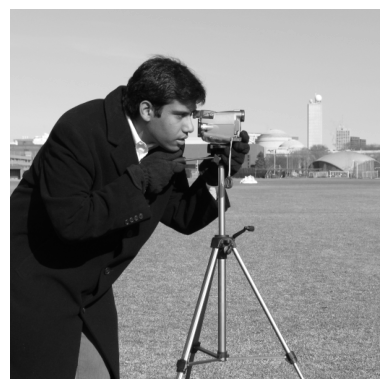

In [2]:
lily = np.array(data.camera(), dtype = float)
lily_img = Image.fromarray(lily)
lily_resize = lily_img.resize((512, 512))
lily_resize = (lily_resize - np.min(lily_resize))/(np.max(lily_resize) - np.min(lily_resize))
plt.imshow(lily_resize, cmap = "gray", norm = Normalize(vmin = 0, vmax = 1))
plt.axis("off")

(-0.5, 127.5, 127.5, -0.5)

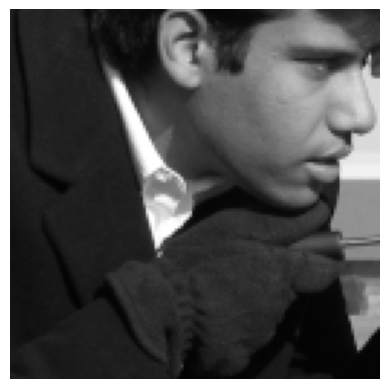

In [16]:
plt.imshow(lily_resize[128:256, 128:256], cmap = "gray", norm = Normalize(vmin = 0, vmax = 1))
plt.axis("off")

In [3]:
def angular_spectrum_propagator(wavefront, z, wavelength, dx):
    k = 2 * np.pi / wavelength
    N = wavefront.shape[0]
    fx = np.fft.fftfreq(N, d=dx)
    fy = np.fft.fftfreq(N, d=dx)
    FX, FY = np.meshgrid(fx, fy)
    
    # 波数空間での z 成分
    H = np.exp(1j * z * np.sqrt(np.maximum(k**2 - (2*np.pi*FX)**2 - (2*np.pi*FY)**2, 0)))
    
    U1 = np.fft.fft2(wavefront)
    U2 = H * U1
    u2 = np.fft.ifft2(U2)
    return u2

(-0.5, 127.5, 127.5, -0.5)

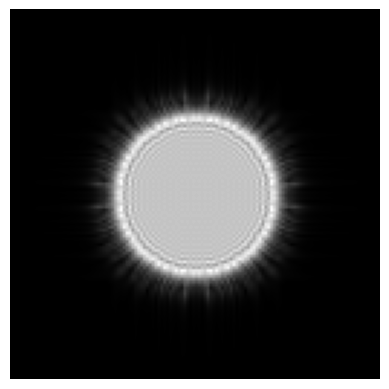

In [29]:
probe_dim = 128
dx = 1e-6  # 1 µm ピクセルピッチ
wavelength = 0.5e-6  # 0.5 µm の波長
x = np.linspace(-probe_dim/2, probe_dim/2-1, probe_dim) * dx
X, Y = np.meshgrid(x, x)
aperture = ((X**2 + Y**2) < (30e-6)**2).astype("complex128")  # 半径50µm

z = 3e-5

result = angular_spectrum_propagator(aperture, z, wavelength, dx)
plt.imshow(np.abs(result), cmap="gray")
plt.axis("off")

(-0.5, 127.5, 127.5, -0.5)

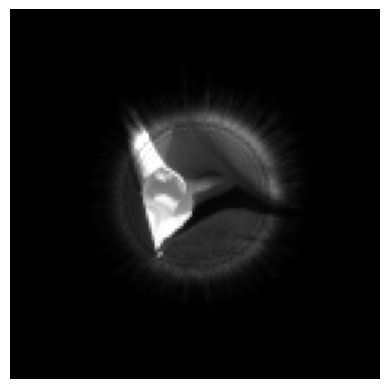

In [30]:
plt.imshow(np.abs(lily_resize[128:256, 128:256]*result), cmap = "gray", norm = Normalize(vmin = 0, vmax = 1))
plt.axis("off")

(-0.5, 127.5, 127.5, -0.5)

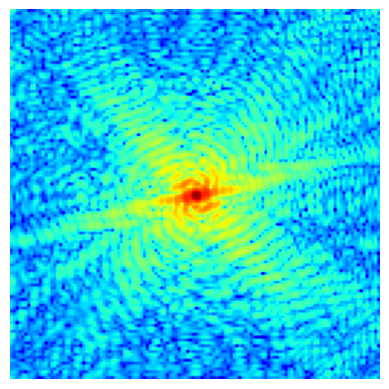

In [33]:
plt.imshow(np.log10(1e-1 + np.abs(fftshift(fft2(lily_resize[128:256, 128:256]*result)))), cmap = "jet")
plt.axis("off")